(360, 480, 3)


(-0.5, 479.5, 359.5, -0.5)

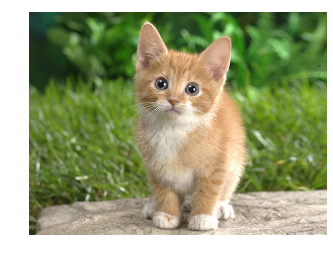

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import caffe
caffe_root='/home/tjliu/caffe/'
import os,sys
os.chdir(caffe_root)
sys.path.insert(0,caffe_root+'python')
im = caffe.io.load_image('examples/images/cat.jpg')
print im.shape
plt.imshow(im)
plt.axis('off')

In [3]:
! cat examples/net_surgery/conv.prototxt

# Simple single-layer network to showcase editing model parameters.
name: "convolution"
input: "data"
input_shape {
  dim: 1
  dim: 3
  dim: 100
  dim: 100
}
layer {
  name: "conv"
  type: "Convolution"
  bottom: "data"
  top: "conv"
  convolution_param {
    num_output: 16
    kernel_size: 5
    stride: 1
    weight_filler {
      type: "gaussian"
      std: 0.01
    }
    bias_filler {
      type: "constant"
      value: 0
    }
  }
}


In [4]:
net = caffe.Net('examples/net_surgery/conv.prototxt', caffe.TEST)
im_input=im[np.newaxis,:,:,:].transpose(0,3,1,2)
print "data-blobs:",im_input.shape
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input
plt.imshow(net.blobs['data'].data[0].transpose(1,2,0))
plt.axis('off')

data-blobs: (1, 3, 360, 480)


TypeError: No to_python (by-value) converter found for C++ type: boost::shared_ptr<caffe::Blob<float> >